Model Notbook

This is a notebook for model Age & Gender detector. Here, we will extract the data, train it and fit it into our model and will evaluate our results, and optimized the model for better result.

Import Necessary Libraries

In [1]:
import tensorflow as tf
import cv2 as cv2 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

##Extract Data from the Dataset

If the dataset is not downloaded,the you can download the dataset from given link[Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [2]:
fldr = "./UTKFace"

In [3]:
import os
files = os.listdir(fldr)

In [4]:
import cv2
import os

ages = []
genders = []
images = []
# Assuming 'files' is a list of filenames and 'fldr' is the folder containing the files
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = os.path.join(fldr, fle)
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)


./UTKFace\100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace\100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace\100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace\100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace\100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace\100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace\100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace\100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace\100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace\100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace\100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace\101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace\101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace\103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace\105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace\105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace\105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace\105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace\105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace\10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace\10_0_0_2017

#Create list of Age and Gender from Dataset

In [5]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)    

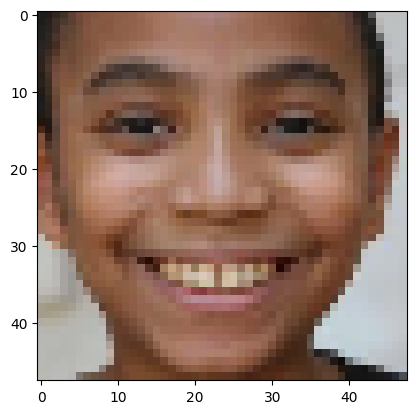

In [6]:
#Viewing the Samples :
plt.imshow(images[87])

In [7]:
print(ages[87])

10


In [8]:
print(genders[87])

0


In [9]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [10]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [11]:
#Finding the number of elements in Datasets :
values,counts = np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


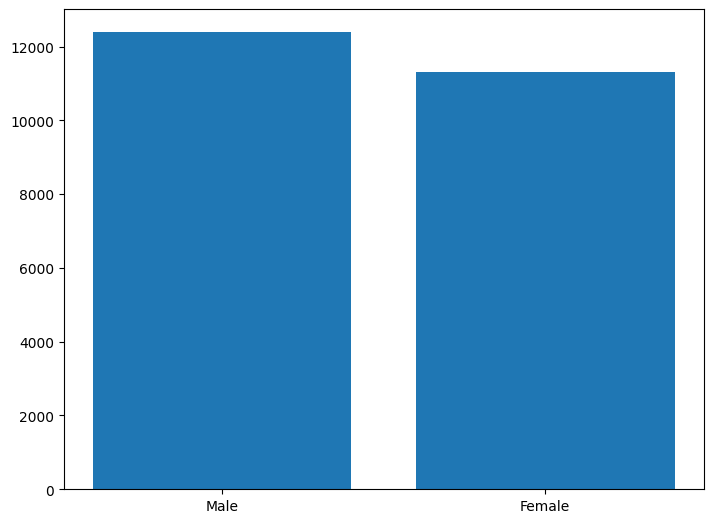

In [12]:
#Ploting the Male and Female samples :
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

In [13]:
#Finding the no. of samples in each Age :
values,counts = np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [14]:
#Converting age couunts to list :
val = values.tolist()
cnt = counts.tolist()

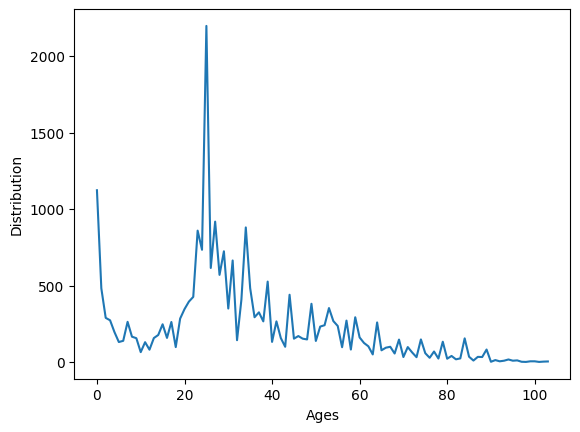

In [15]:
#Ploting the samples agewise :
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [16]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

In [17]:
images_f_2 = images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f = np.array(labels)


In [20]:
#Splitting Datasets into test and train :
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test = train_test_split(images_f_2,labels_f,train_size = 0.25)

In [22]:
y_train[0:5]

array([[21,  1],
       [ 4,  1],
       [39,  0],
       [26,  0],
       [22,  1]])

In [23]:
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [24]:
y_train_2[0][0:5]

array([1, 1, 0, 0, 1])

In [25]:
y_train_2[1][0:5]

array([21,  4, 39, 26, 22])

#Defining the Model:

In [26]:
def Convolution(input_tensor,filters):
   x = Conv2D(filters=filters, kernel_size=(3,3), padding="same", strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
   x = Dropout(0.1)(x)
   x = Activation('relu')(x)
   return x

In [27]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def create_model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Conv2D(256, (3, 3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

Model = create_model((48,48,3))


In [28]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 46, 46, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 21, 21, 64)           18496     ['max_pooling2d[0][0]']   

#Initializing the Model :

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [30]:

fle_s = 'Age_Sex_Detection.h5'
checkpoint = ModelCheckpoint(fle_s,moniter='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list = [checkpoint,Early_stop]

#Runnig thee Model :
##It takes some time to run...

In [31]:
History = Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


93/93 [==============================] - ETA: 0s - loss: 18.2602 - sex_out_loss: 0.7335 - age_out_loss: 17.5267 - sex_out_accuracy: 0.5153 - age_out_accuracy: 0.0440
Epoch 1: val_loss improved from inf to 16.47449, saving model to Age_Sex_Detection.h5


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 398s 4s/step - loss: 18.2602 - sex_out_loss: 0.7335 - age_out_loss: 17.5267 - sex_out_accuracy: 0.5153 - age_out_accuracy: 0.0440 - val_loss: 16.4745 - val_sex_out_loss: 0.6940 - val_age_out_loss: 15.7805 - val_sex_out_accuracy: 0.5211 - val_age_out_accuracy: 0.0481
Epoch 2/250
93/93 [==============================] - ETA: 0s - loss: 16.0229 - sex_out_loss: 0.6929 - age_out_loss: 15.3301 - sex_out_accuracy: 0.5217 - age_out_accuracy: 0.0450
Epoch 2: val_loss improved from 16.47449 to 15.52058, saving model to Age_Sex_Detection.h5
93/93 [==============================] - 70s 611ms/step - loss: 16.0229 - sex_out_loss: 0.6929 - age_out_loss: 15.3301 - sex_out_accuracy: 0.5217 - age_out_accuracy: 0.0450 - val_loss: 15.5206 - val_sex_out_loss: 0.6919 - val_age_out_loss: 14.8286 - val_sex_out_accuracy: 0.5211 - val_age_out_accuracy: 0.0481
Epoch 3/250
93/93 [==============================] - ETA: 0s - loss: 15.0552 - sex_out_loss: 0.6912 - age_out_los

In [32]:
#Model Evaluation :
Model.evaluate(x_test,y_test_2)

556/556 [==============================] - 78s 39ms/step - loss: 8.0758 - sex_out_loss: 0.3183 - age_out_loss: 7.7575 - sex_out_accuracy: 0.8556 - age_out_accuracy: 0.0081


[8.075776100158691,
 0.3183223009109497,
 7.757456302642822,
 0.8555761575698853,
 0.008098532445728779]

In [33]:
pred = Model.predict(x_test)
pred[1]

556/556 [==============================] - 87s 35ms/step


array([[27.742992],
       [19.85752 ],
       [88.07523 ],
       ...,
       [19.071571],
       [29.28357 ],
       [26.034632]], dtype=float32)

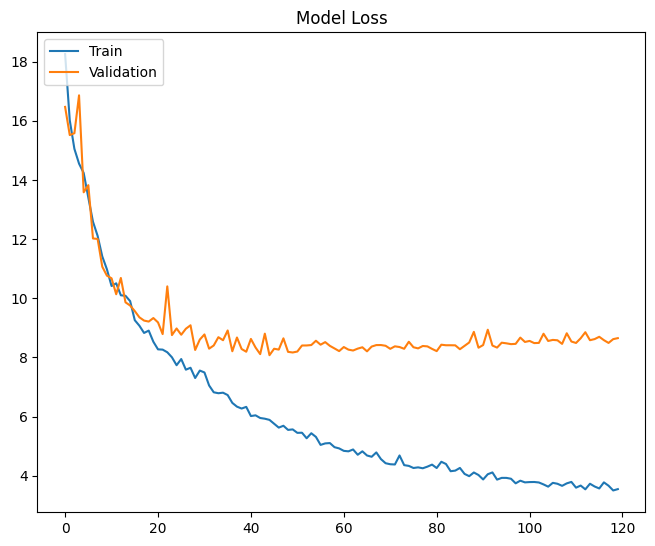

In [34]:
#Plotting Loss :
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

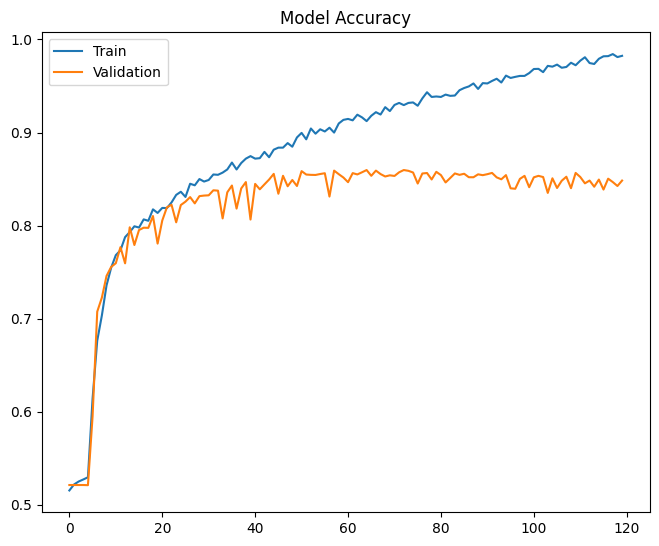

In [35]:
#Plotting Sex Accuracy :
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

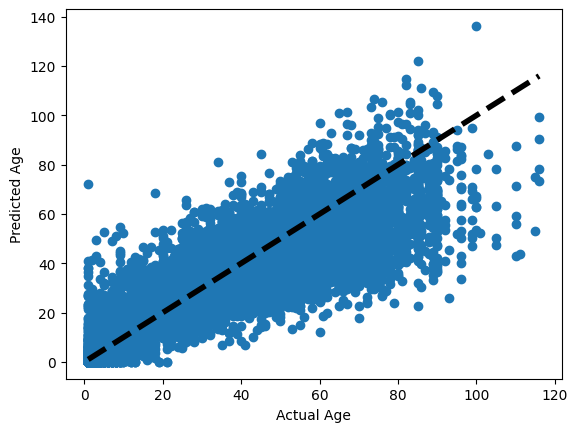

In [36]:
#Plotting age accuracy :
fig,ax = plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#Making report of the Model (Gender only) :

In [37]:
i = 0
pred_l = []
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i = i+1

C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\3265833819.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(pred[0][i])))


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [39]:
report = classification_report(y_test_2[0],pred_l)

In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      9266
           1       0.87      0.82      0.85      8515

    accuracy                           0.86     17781
   macro avg       0.86      0.85      0.85     17781
weighted avg       0.86      0.86      0.86     17781



In [41]:
#Making Heatmap of the Model (Gender only) :
results = confusion_matrix(y_test_2[0],pred_l)

<Axes: >

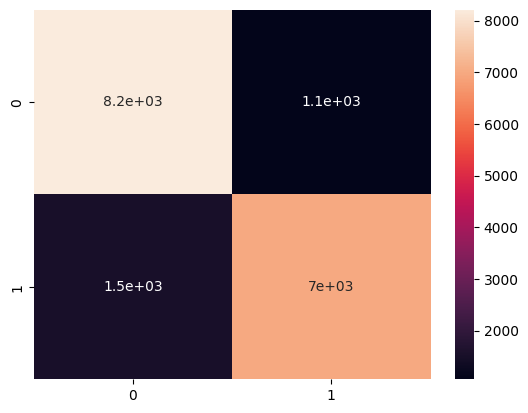

In [42]:
import seaborn as sns
sns.heatmap(results,annot=True,)

##Testing the images ourselfs :

In [43]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male','Female']
    age = int(np.round(pred_l[1][0]))  # Accessing the first element of the predicted age array
    sex = int(np.round(pred_l[0][0]))  # Accessing the first element of the predicted sex array
    print("Predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])
    


1/1 [==============================] - 0s 224ms/step


C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))  # Accessing the first element of the predicted age array
C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))  # Accessing the first element of the predicted sex array


Predicted Age is93
Predicted Gender isFemale


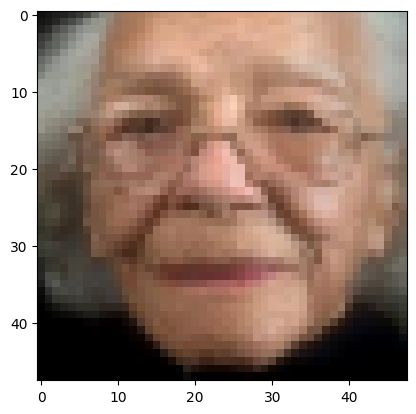

In [48]:
test_image(5,images_f,images_f_2,Model)

1/1 [==============================] - 0s 43ms/step
Predicted Age is32
Predicted Gender isMale


C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))  # Accessing the first element of the predicted age array
C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))  # Accessing the first element of the predicted sex array


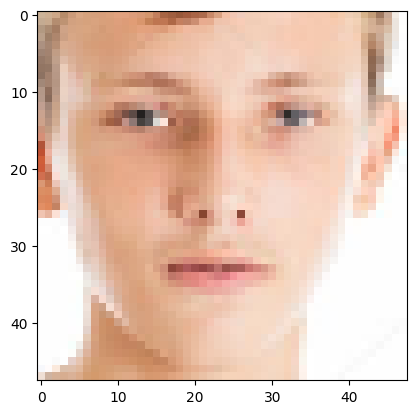

In [45]:
test_image(25,images_f,images_f_2,Model)

1/1 [==============================] - 0s 38ms/step
Predicted Age is3
Predicted Gender isMale


C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))  # Accessing the first element of the predicted age array
C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))  # Accessing the first element of the predicted sex array


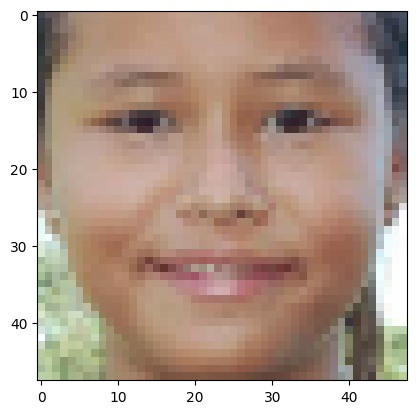

In [46]:
test_image(150,images_f,images_f_2,Model)

1/1 [==============================] - 0s 47ms/step
Predicted Age is19
Predicted Gender isFemale


C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))  # Accessing the first element of the predicted age array
C:\Users\AkshayKhobragade\AppData\Local\Temp\ipykernel_10260\1735724222.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))  # Accessing the first element of the predicted sex array


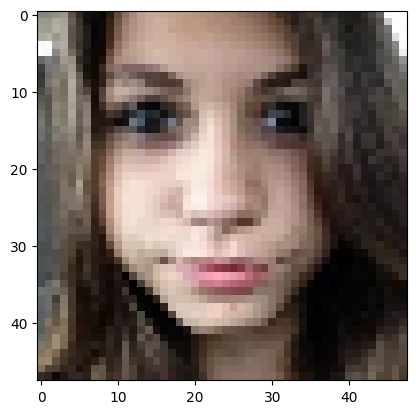

In [47]:
test_image(1290,images_f,images_f_2,Model)